In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
os.chdir("C:/Users/phu/OneDrive/Pictures")
import plotly as px

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
#take a look at the head
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#drop rows with no customer ID
data = data.dropna(subset=['CustomerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [36]:
#create an invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail() 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex,MonthKey,Revenue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5,2011-12,14.85


In [6]:
#create a column index with the minimum invoice date aka first time customer was acquired
data['Cohort Month'] =  data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01


In [7]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [8]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(data,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(data,'Cohort Month')

In [9]:
#check the series 
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [41]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex,MonthKey,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34


In [11]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
data['CohortIndex'] = year_diff*12+month_diff+1
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [12]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = data.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [13]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

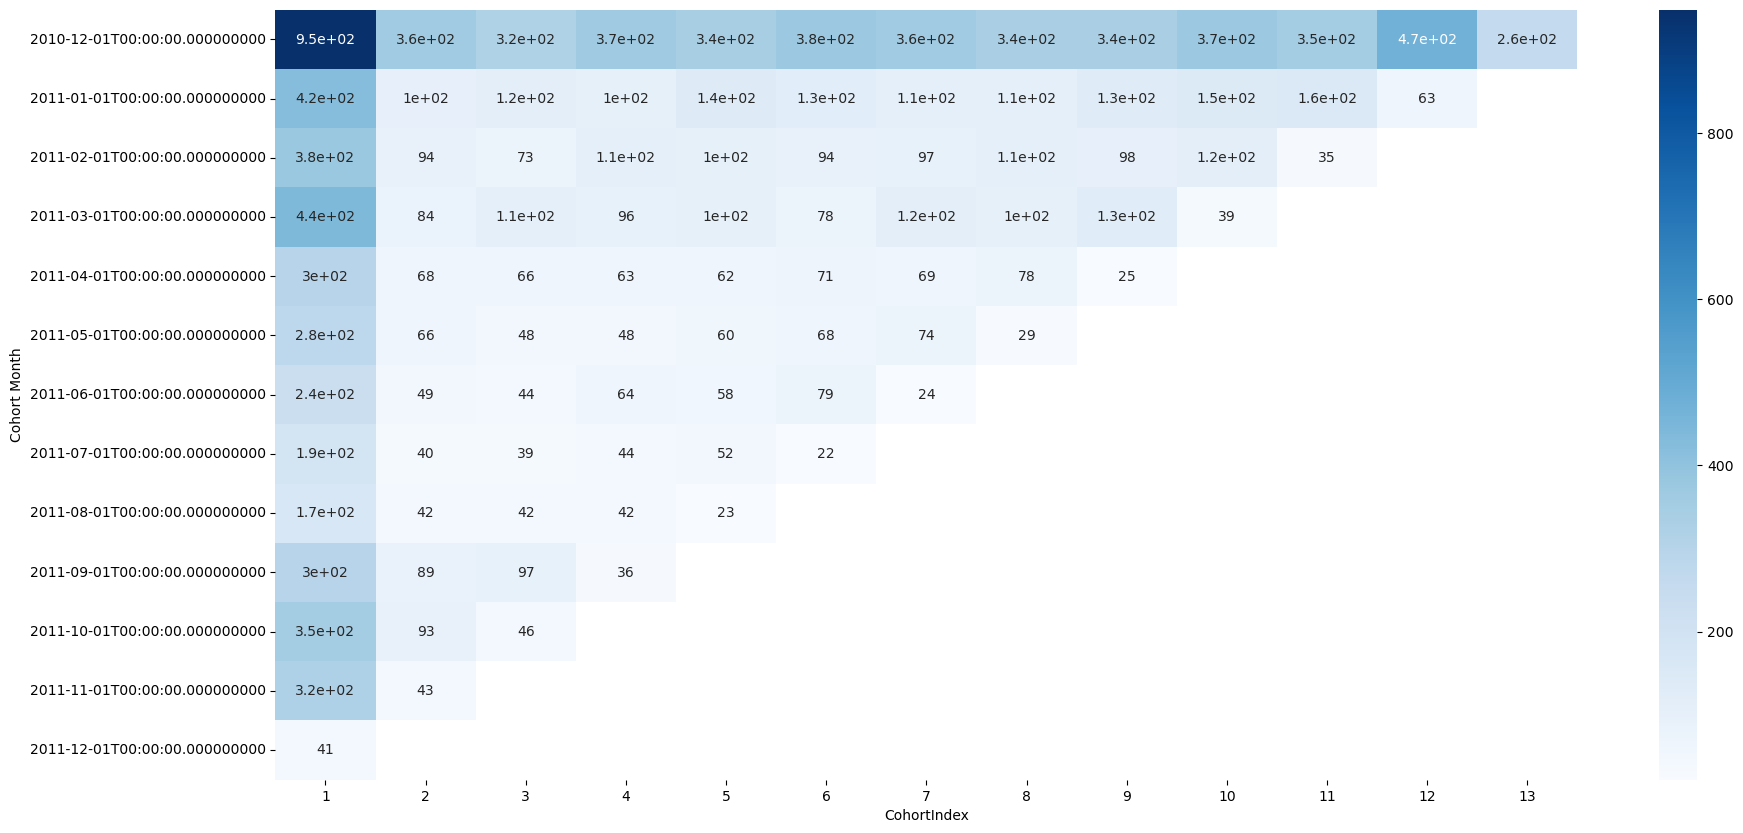

In [14]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [15]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

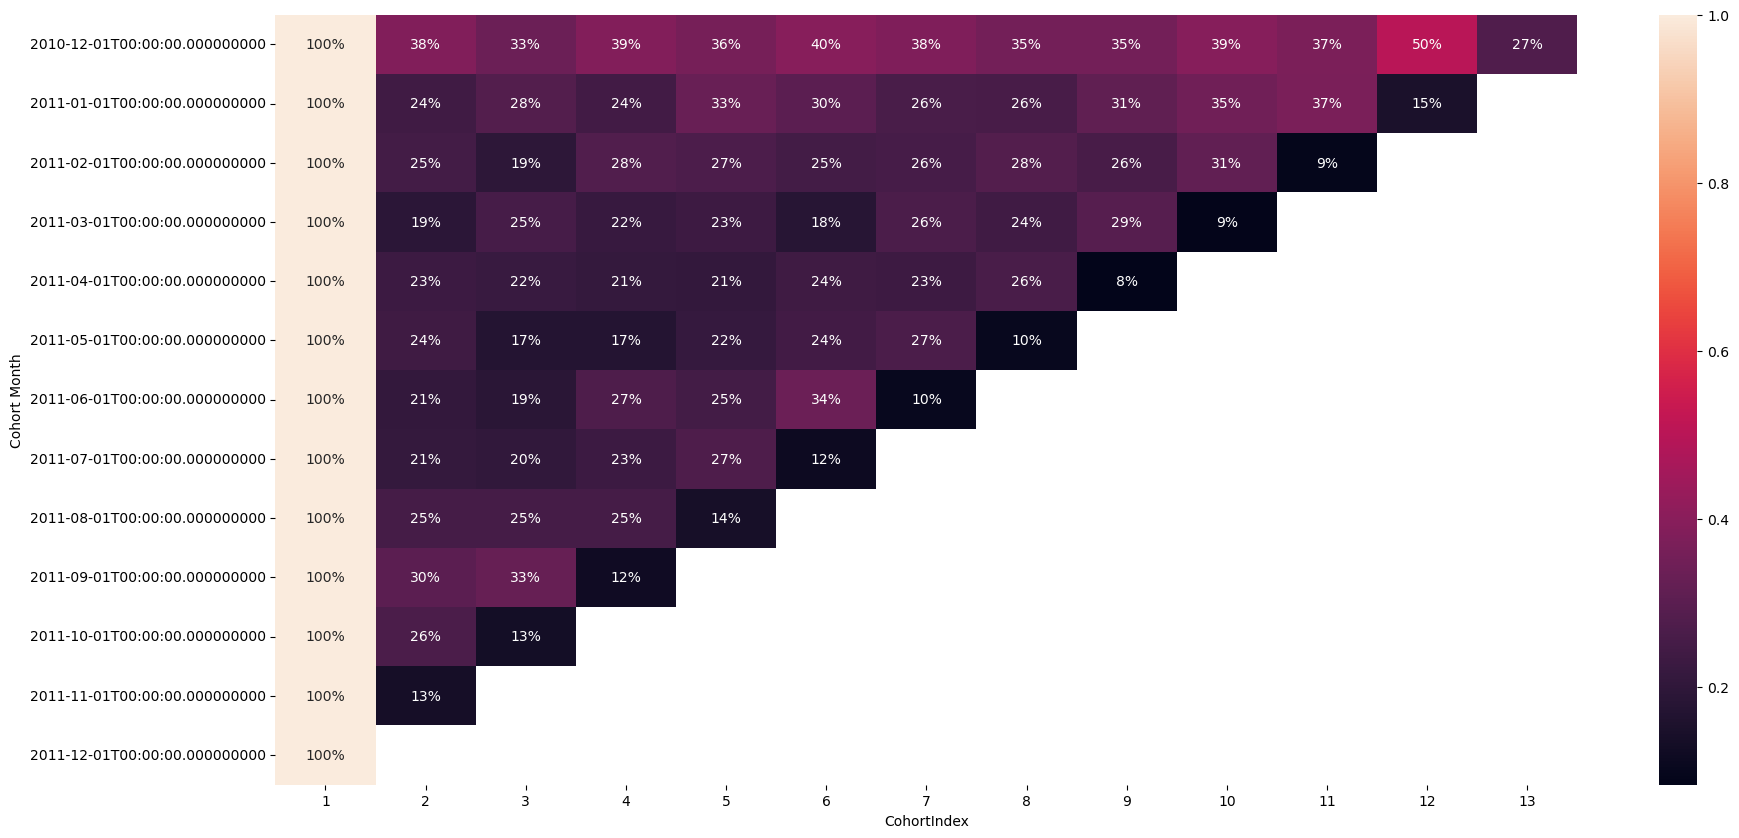

In [16]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')


# Caculater RFM

In [17]:
print(data.describe())
print(data.info())

            Quantity      UnitPrice     CustomerID    CohortIndex
count  406829.000000  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570       5.185088
std       248.693370      69.315162    1713.600303       3.859473
min    -80995.000000       0.000000   12346.000000       1.000000
25%         2.000000       1.250000   13953.000000       1.000000
50%         5.000000       1.950000   15152.000000       4.000000
75%        12.000000       3.750000   16791.000000       8.000000
max     80995.000000   38970.000000   18287.000000      13.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int6

# Calculate revenue by month

   MonthKey      Revenue
0   2010-12   554604.020
1   2011-01   475074.380
2   2011-02   436546.150
3   2011-03   579964.610
4   2011-04   426047.851
5   2011-05   648251.080
6   2011-06   608013.160
7   2011-07   574238.481
8   2011-08   616368.000
9   2011-09   931440.372
10  2011-10   974603.590
11  2011-11  1132407.740
12  2011-12   342506.380


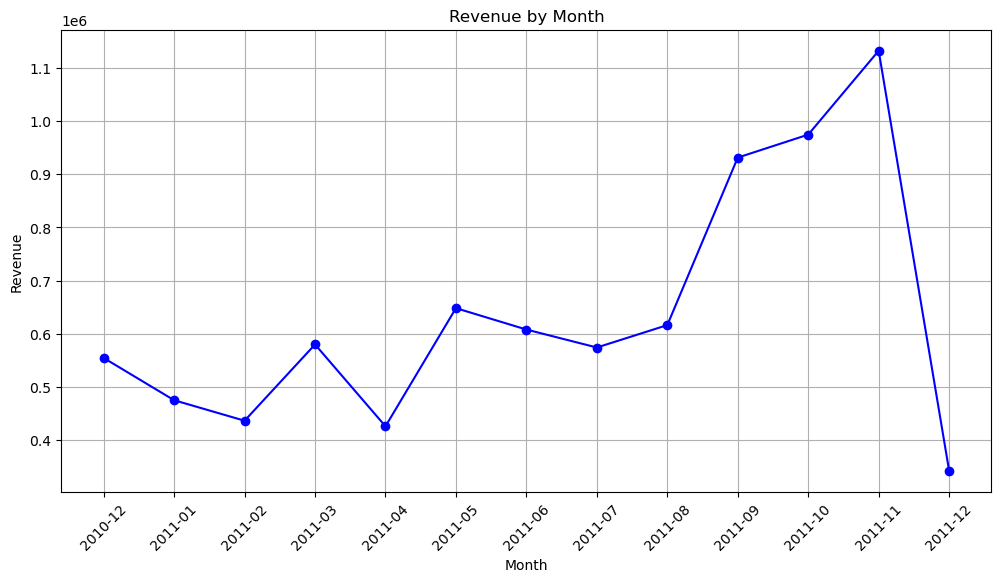

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the data type of column 'InvoiceDate' from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create 'MonthKey' column for reporting and visualization
data['MonthKey'] = data['InvoiceDate'].dt.to_period('M').astype(str)

# Calculate revenue for each row and create a new DataFrame with columns 'MonthKey' - 'Revenue'
data['Revenue'] = data['UnitPrice'] * data['Quantity']
revenue_by_month = data.groupby('MonthKey')['Revenue'].sum().reset_index()

# print
print(revenue_by_month)

# plotly
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['MonthKey'], revenue_by_month['Revenue'], linestyle='-', marker='o', color='blue')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)  
plt.grid(True) 
plt.show()



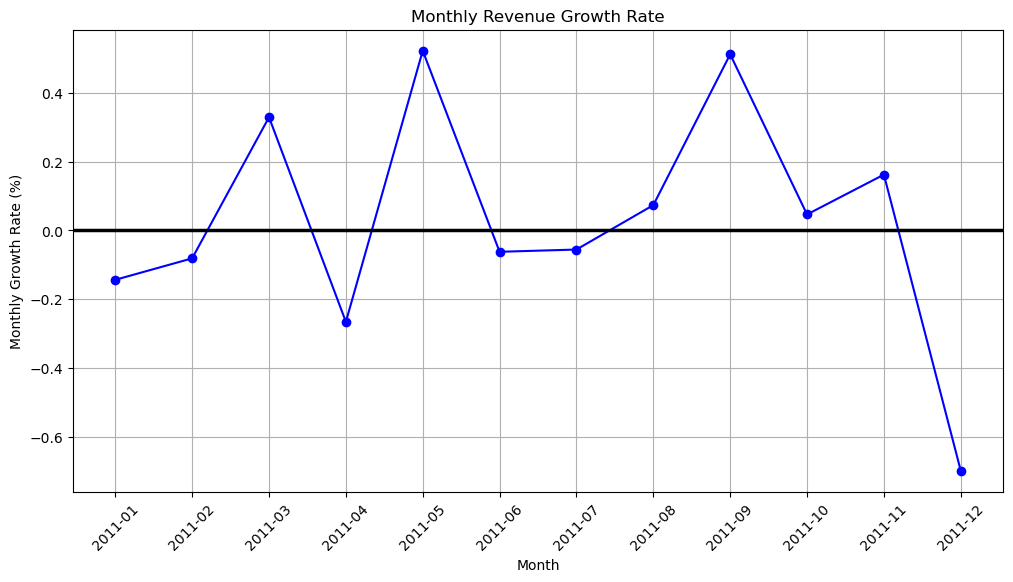

In [19]:
# Calculate the monthly growth rate
revenue_by_month['MonthlyGrowth'] = revenue_by_month['Revenue'].pct_change()

# plotly
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['MonthKey'], revenue_by_month['MonthlyGrowth'], linestyle='-', marker='o', color='blue')
plt.axhline(y=0, color='k', linestyle='-', linewidth=2.5)  
plt.title("Monthly Revenue Growth Rate")
plt.xlabel("Month")
plt.ylabel("Monthly Growth Rate (%)")
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


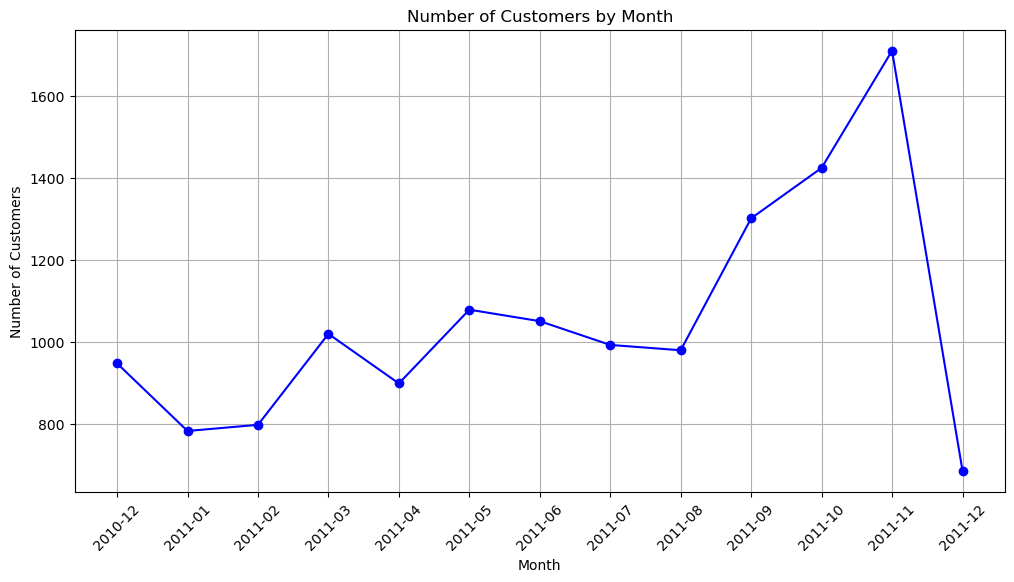

In [20]:
# Calculate the number of customers per month
customer_by_month = data.groupby('MonthKey')['CustomerID'].nunique().reset_index()

# Reformat column 'MonthKey' to string
customer_by_month['MonthKey'] = customer_by_month['MonthKey'].astype(str)

# plotly
plt.figure(figsize=(12, 6))
plt.plot(customer_by_month['MonthKey'], customer_by_month['CustomerID'], linestyle='-', marker='o', color='blue')
plt.title("Number of Customers by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


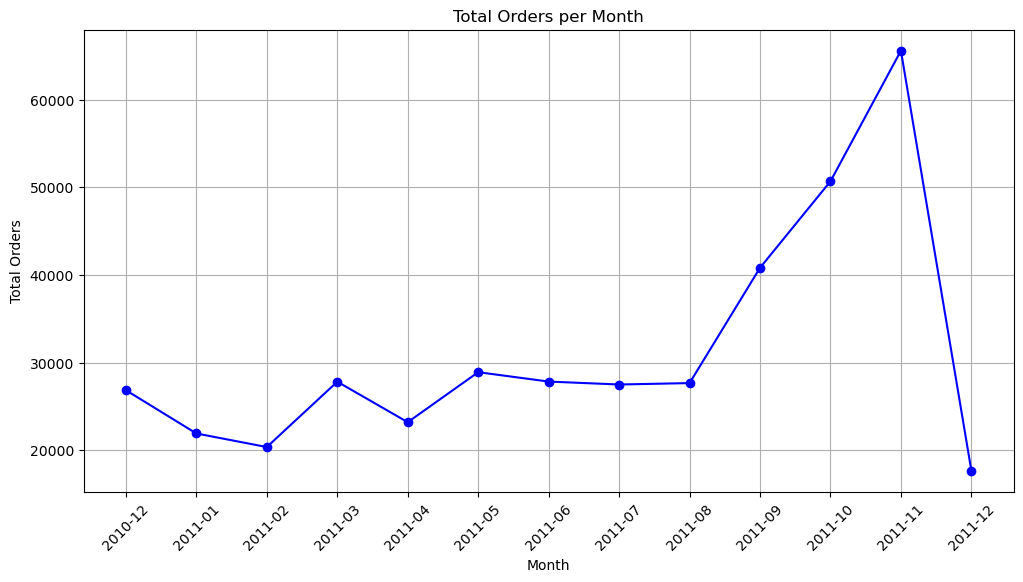

In [21]:
# Calculate the number of orders per month
order_by_month = data.groupby('MonthKey')['InvoiceNo'].count().reset_index()

# Reformat column 'MonthKey' to string
order_by_month['MonthKey'] = order_by_month['MonthKey'].astype(str)

# plotly
plt.figure(figsize=(12, 6))
plt.plot(order_by_month['MonthKey'], order_by_month['InvoiceNo'], linestyle='-', marker='o', color='blue')
plt.title("Total Orders per Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()


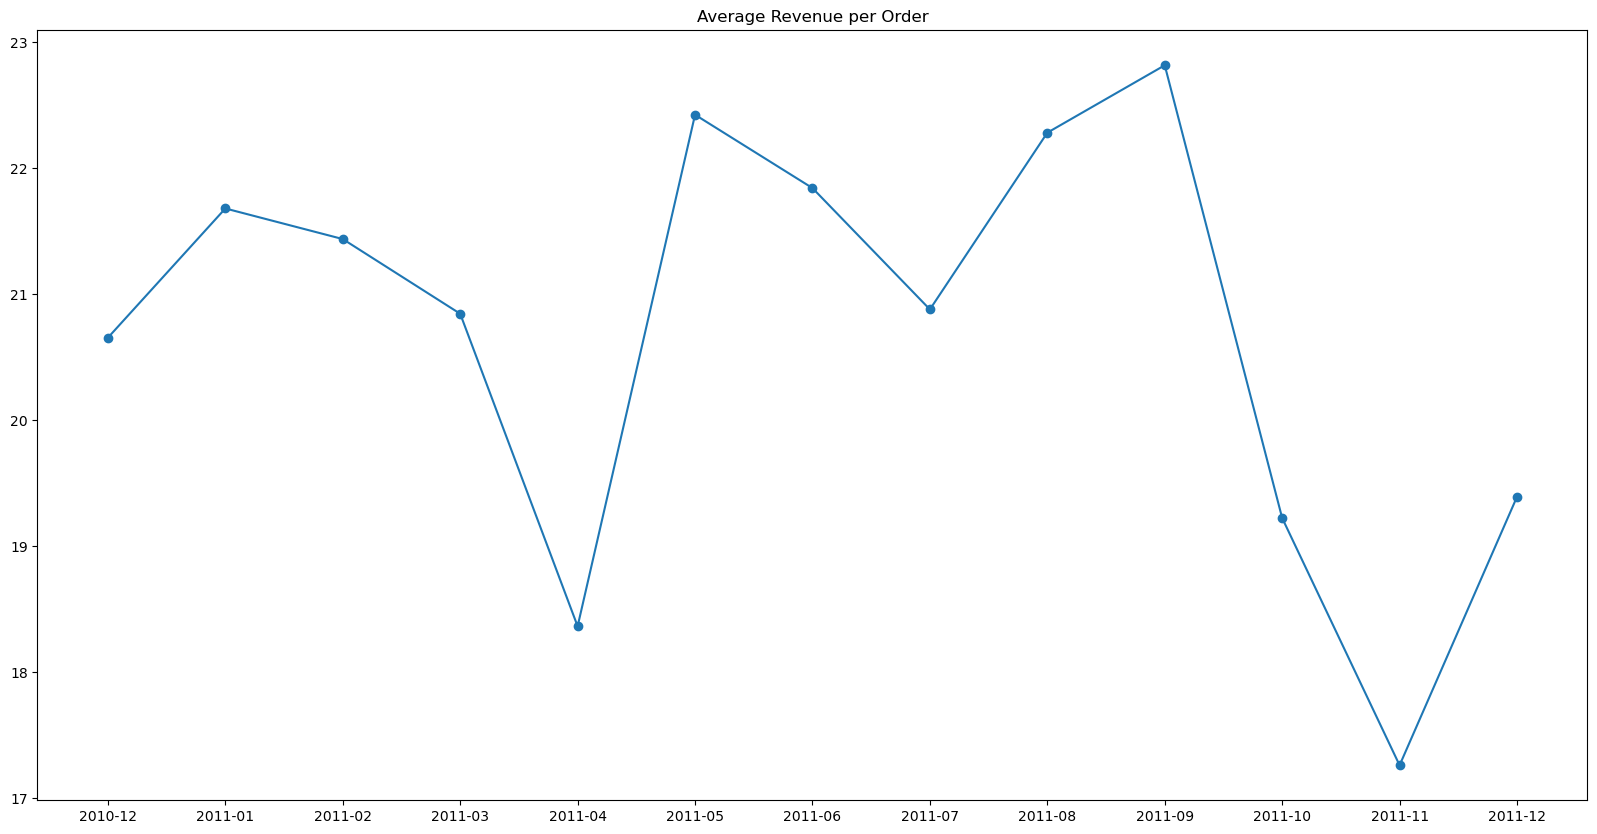

In [22]:

avg_order_revenue = data.groupby(['MonthKey'])['Revenue'].mean().reset_index()

avg_order_revenue['MonthKey'] = avg_order_revenue['MonthKey'].apply(str)

# Plot regression line

plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('MonthKey', 'Revenue', data=avg_order_revenue, linestyle='-', marker='o')
plt.title("Average Revenue per Order")
plt.show()



In [23]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex,MonthKey,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5,2011-12,16.60


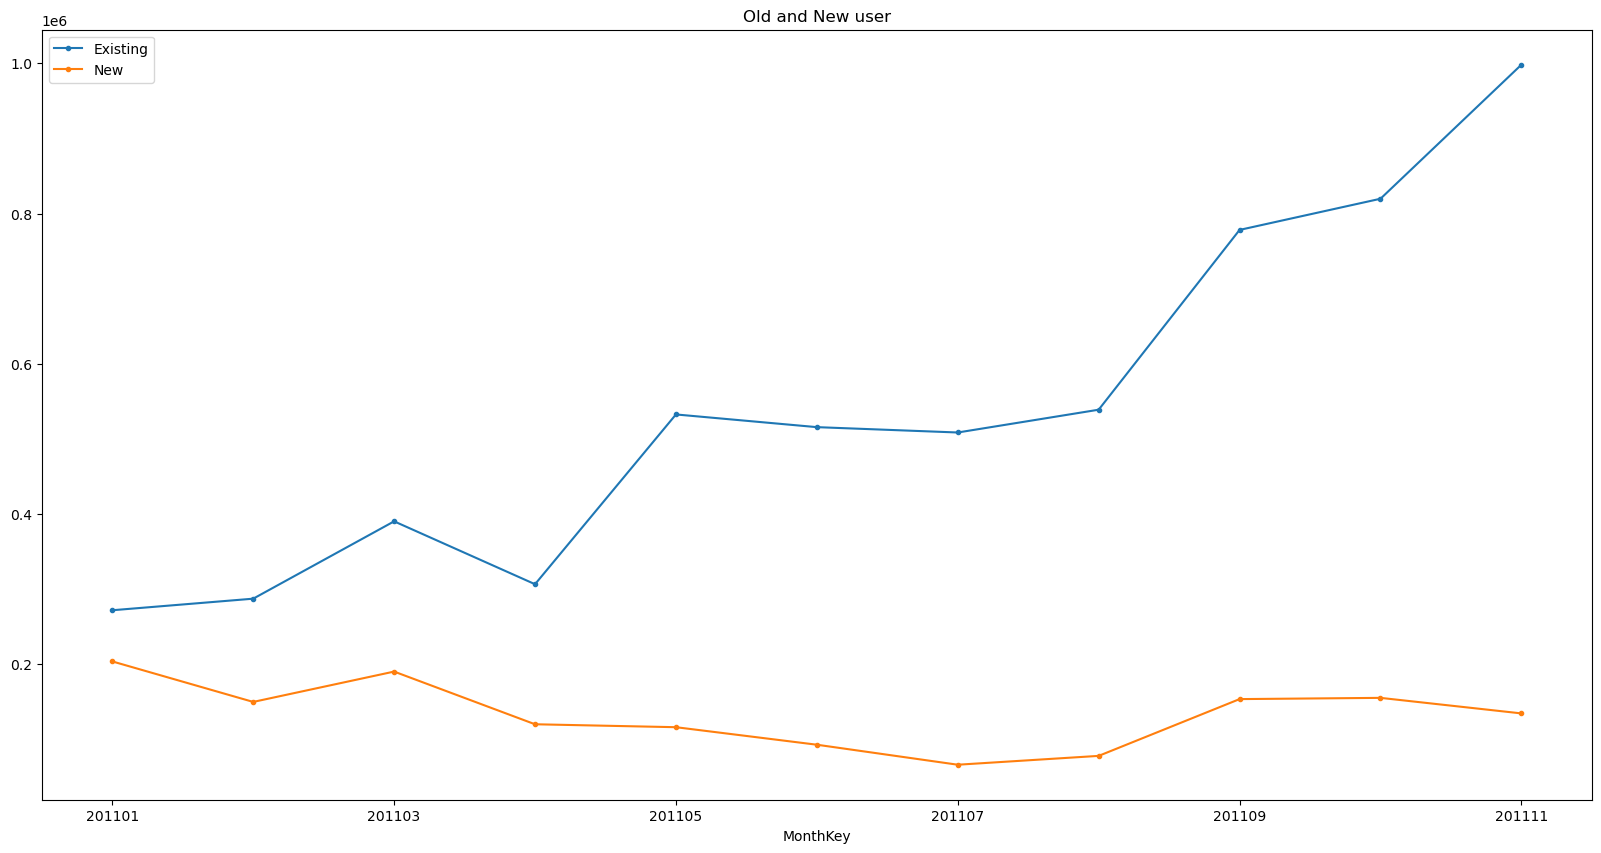

In [24]:
#create a dataframe contaning CustomerID and first purchase date
df_min_date_purchase =data.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_date_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_date_purchase['MinMonthKey'] = df_min_date_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
retail_new_df = pd.merge(data, df_min_date_purchase, on='CustomerID')

retail_new_df.head()

#create a column called User Type and assign Existing
#if User's First Purchase Year Month before the selected Invoice Year Month
retail_new_df['UserType'] = 'New'
# Extracting year and month separately
retail_new_df['Year'] = retail_new_df['MonthKey'].str[:4].astype(int)
retail_new_df['Month'] = retail_new_df['MonthKey'].str[5:].astype(int)

# Converting year and month to an integer format
retail_new_df['MonthKey'] = retail_new_df['Year'] * 100 + retail_new_df['Month']

# Dropping the intermediate 'Year' and 'Month' columns
retail_new_df.drop(['Year', 'Month'], axis=1, inplace=True)

# Now, you can proceed with your existing code
retail_new_df.loc[retail_new_df['MonthKey'] > retail_new_df['MinMonthKey'], 'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
revenue_per_month = retail_new_df.groupby(['MonthKey','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
revenue_per_month = revenue_per_month.query("MonthKey != 201012 and MonthKey != 201112")

revenue_per_month['MonthKey'] = revenue_per_month['MonthKey'].apply(str)
revenue_per_month.set_index('MonthKey',inplace=True)
# Plot regression line

revenue_per_month.reset_index(inplace=True)  # Reset index before plotting

plt.rcParams["figure.figsize"] = [20, 10]
fig, ax = plt.subplots()
for label, grp in revenue_per_month.groupby('UserType'):
    grp.plot(x='MonthKey', y='Revenue', ax=ax, label=label, style='.-')
plt.title("Old and New user")
plt.show()



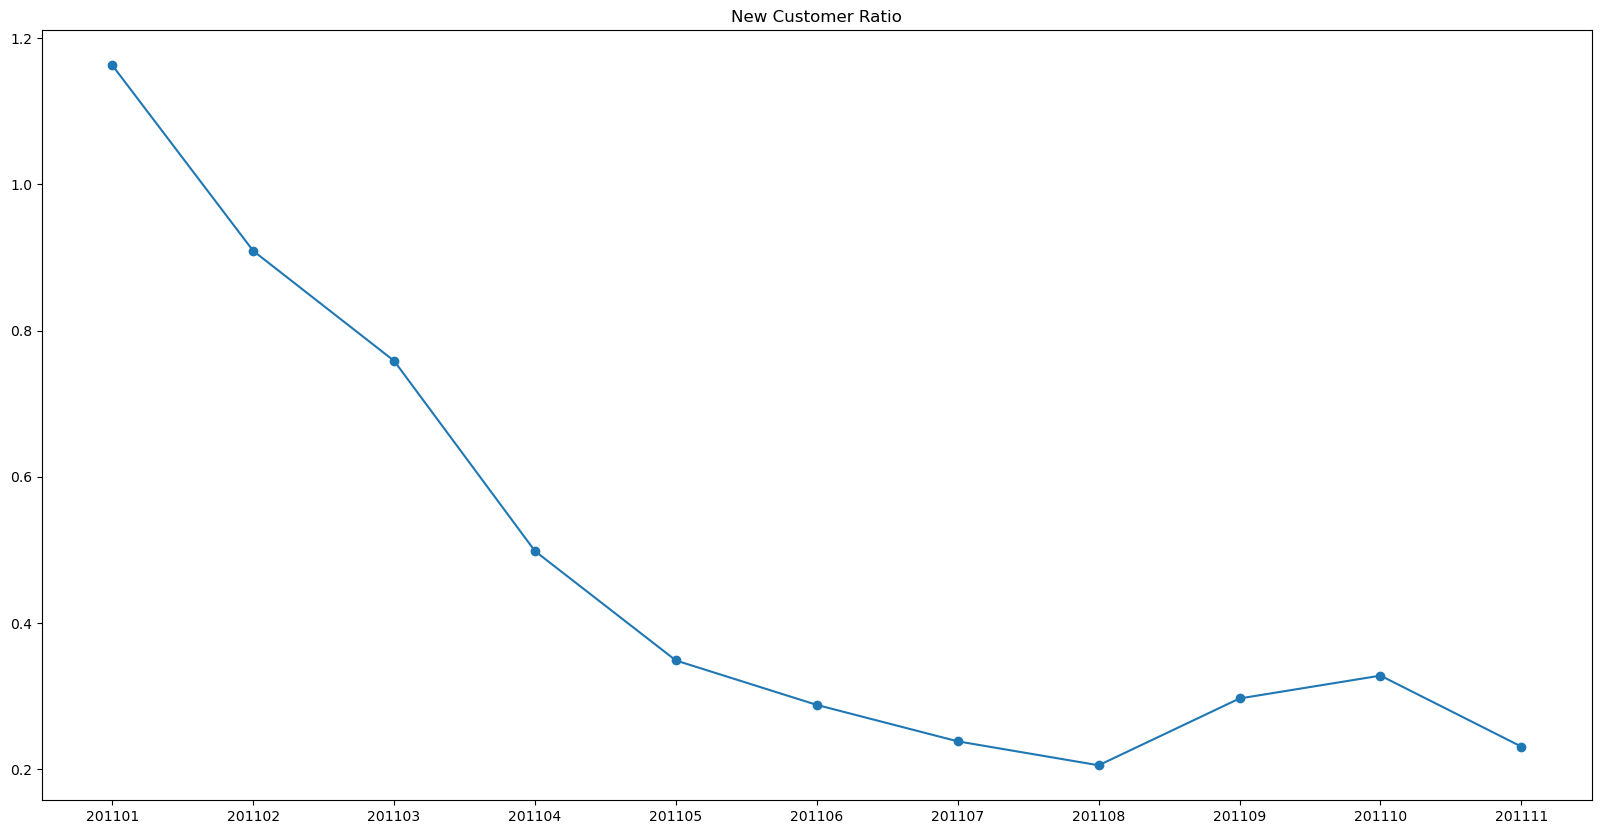

In [25]:
new_user_ratio = retail_new_df.query("UserType == 'New'").groupby(['MonthKey'])['CustomerID'].nunique()/retail_new_df.query("UserType == 'Existing'").groupby(['MonthKey'])['CustomerID'].nunique()
new_user_ratio = new_user_ratio.reset_index()
new_user_ratio = new_user_ratio.dropna()
new_user_ratio.columns = ["MonthKey","NewCustomerRatio"]

new_user_ratio = new_user_ratio.query("MonthKey != 201012 and MonthKey != 201112")
new_user_ratio['MonthKey'] = new_user_ratio['MonthKey'].apply(str)

# Plot regression line

plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('MonthKey', 'NewCustomerRatio', data=new_user_ratio, linestyle='-', marker='o')
plt.title("New Customer Ratio")
plt.show()



MonthKey  CustomerID  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  \
0            12346.0        0        1        0        0        0        0   
1            12347.0        1        1        0        0        1        0   
2            12348.0        1        1        0        0        1        0   
3            12349.0        0        0        0        0        0        0   
4            12350.0        0        0        1        0        0        0   

MonthKey  2011-06  2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  
0               0        0        0        0        0        0        0  
1               1        0        1        0        1        0        1  
2               0        0        0        1        0        0        0  
3               0        0        0        0        0        1        0  
4               0        0        0        0        0        0        0  


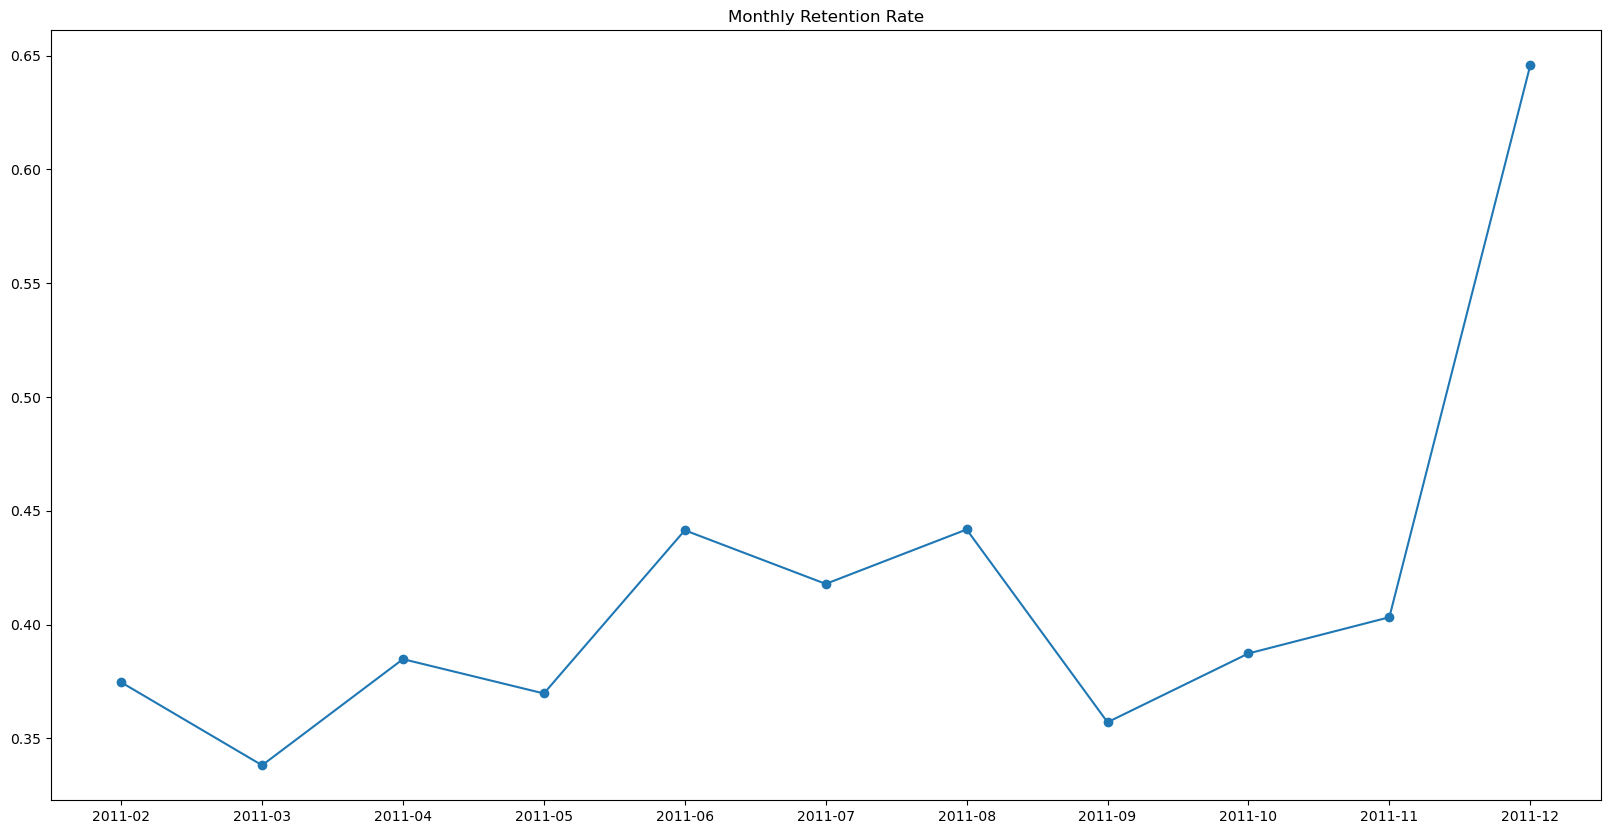

In [26]:
#identify which users are active by looking at their revenue per month
df_user_purchase = data.groupby(['CustomerID','MonthKey'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
df_retention = pd.crosstab(df_user_purchase['CustomerID'], df_user_purchase['MonthKey']).reset_index()

print(df_retention.head())

# create an array of dictionaries which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['MonthKey'] = selected_month  # Keep MonthKey as string
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month] > 0) & (df_retention[prev_month] > 0)][selected_month].sum()
    retention_array.append(retention_data)

# convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']

# convert MonthKey to string
df_retention['MonthKey'] = df_retention['MonthKey'].astype(str)

# Plot retention rate
plt.rcParams["figure.figsize"] = [20, 10]
plt.plot('MonthKey', 'RetentionRate', data=df_retention, linestyle='-', marker='o')
plt.title("Monthly Retention Rate")
plt.show()


In [27]:
retail_rfm_df = data.copy()
#remove canceled orders
retail_rfm_df = retail_rfm_df[retail_rfm_df['Quantity']>0]
#remove rows where customerID are NA
retail_rfm_df.dropna(subset=['CustomerID'],how='all',inplace=True)
retail_rfm_df = retail_rfm_df[retail_rfm_df['InvoiceDate']> "2010-12-31"]
retail_rfm_df = retail_rfm_df[retail_rfm_df['InvoiceDate']< "2011-12-01"]


In [28]:
now = dt.date(2011,11,30)
#create a new column called date which contains the date of invoice only
retail_rfm_df['date'] = pd.DatetimeIndex(retail_rfm_df['InvoiceDate']).date

#group by customers and check last date of purshace
recency_df = retail_rfm_df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']

#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
print(recency_df.head())


   CustomerID  Recency
0     12346.0      316
1     12347.0       30
2     12348.0       66
3     12349.0        9
4     12350.0      301


In [29]:

# drop duplicates
retail_rfm_df_copy = retail_rfm_df
retail_rfm_df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_rfm_df_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()


,CustomerID,Frequency
0,12346.0,1
1,12347.0,5
2,12348.0,3
3,12349.0,1
4,12350.0,1


In [30]:

monetary_df = retail_rfm_df.groupby(['CustomerID'])['Revenue'].sum().reset_index()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,120.56
2,12348.0,291.76
3,12349.0,15.00
4,12350.0,25.20


In [31]:

#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='CustomerID')
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,1,77183.60
12347.0,30,5,120.56
12348.0,66,3,291.76
12349.0,9,1,15.00
12350.0,301,1,25.20


In [32]:
#RFM Quartiles
rfm_df['Recency'] = -rfm_df['Recency']
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
print(quantiles)
quantiles.to_dict()

### Creation of RFM Segments

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 0
    elif x <= d[p][0.50]:
        return 1
    elif x <= d[p][0.75]:
        return 2
    else:
        return 3

#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(FMScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

rfm_segmentation.head()


rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()


#How many customers do we have in each segment?

print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='333']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==3]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==3]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='133']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='033']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='000']))


      Recency  Frequency  Monetary
0.25   -128.0        1.0   17.4000
0.50    -45.0        2.0   43.5000
0.75    -15.0        4.0  119.6625
Best Customers:  354
Loyal Customers:  980
Big Spenders:  1044
Almost Lost:  91
Lost Customers:  10
Lost Cheap Customers:  385
